# Data Cleaning and Analysis of Cary in North Carolina, US 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import datetime
from datetime import datetime as dt
from fitter import Fitter
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Read CSV file of Cary charging station usage dataset
df = pd.read_csv("/Users/merry/Documents/Deakin - Master of Data Science/T2 2022/SIT782/Datasets/Cary-NC-US-EVCS.csv")

## Data Cleaning

In [14]:
df = df.drop(["address_1", "address_2", "city", "state_province"], axis = 1)
df.head()

,start_date,station_name,charging_time_hh_mm_ss,energy_kwh,zip_postal_code,fee,model_number,latitude,longitude,geopoint
0,2022-03-31T23:55:44+00:00,TOWN OF CARY / DT DECK P2 (2),2:34:03,9.417,27511,0,CT4020-HD-GW,35.785385,-78.779701,35.785385
1,2022-03-30T22:31:38+00:00,TOWN OF CARY / DT DECK P2 (2),1:23:33,8.708,27511,0,CT4020-HD-GW,35.785385,-78.779701,35.785385
2,2022-03-30T17:09:49+00:00,TOWN OF CARY / BOND PARK BH,1:13:00,4.394,27513,0,CT4020-HD-GW,35.781303,-78.825554,35.781303
3,2022-03-30T13:41:38+00:00,TOWN OF CARY / DT DECK P2 (2),1:14:07,6.926,27511,0,CT4020-HD-GW,35.785385,-78.779701,35.785385
4,2022-03-30T13:15:23+00:00,TOWN OF CARY / BOND PARK BH,0:31:06,1.725,27513,0,CT4020-HD-GW,35.781303,-78.825554,35.781303


In [15]:
df.shape

(1025, 10)

In [16]:
print(df["station_name"].unique())
print(df["zip_postal_code"].unique())
print(df["model_number"].unique())

['TOWN OF CARY / DT DECK P2 (2)' 'TOWN OF CARY / BOND PARK BH'
 'TOWN OF CARY / TOWN HALL-PWH' 'TOWN OF CARY / DT DECK P2 (1)'
 'TOWN OF CARY / DT DECK P3 WEST' 'TOWN OF CARY / DT DECK P4'
 'TOWN OF CARY / DT DECK P5']
[27511 27513]
['CT4020-HD-GW' 'CT4025-HD-GW']


In [17]:
# Check missing values
df.isnull().any()

start_date                False
station_name              False
charging_time_hh_mm_ss    False
energy_kwh                False
zip_postal_code           False
fee                       False
model_number              False
latitude                  False
longitude                 False
geopoint                  False
dtype: bool

In [18]:
df.describe()

,energy_kwh,zip_postal_code,fee,latitude,longitude,geopoint
count,1025.000000,1025.000000,1025.0,1025.000000,1025.000000,1025.000000
mean,8.611493,27512.336585,0.0,35.784043,-78.801618,35.784043
std,10.169734,0.942113,0.0,0.003024,0.023145,0.003024
min,0.000000,27511.000000,0.0,35.781303,-78.825554,35.781303
25%,2.597000,27511.000000,0.0,35.781303,-78.825554,35.781303
50%,5.510000,27513.000000,0.0,35.783203,-78.779701,35.783203
75%,10.071000,27513.000000,0.0,35.785446,-78.779282,35.785446
max,72.626000,27513.000000,0.0,35.789215,-78.778816,35.789215


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   start_date              1025 non-null   object 
 1   station_name            1025 non-null   object 
 2   charging_time_hh_mm_ss  1025 non-null   object 
 3   energy_kwh              1025 non-null   float64
 4   zip_postal_code         1025 non-null   int64  
 5   fee                     1025 non-null   int64  
 6   model_number            1025 non-null   object 
 7   latitude                1025 non-null   float64
 8   longitude               1025 non-null   float64
 9   geopoint                1025 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 80.2+ KB


## Data Exploration

### Charge Time

In [29]:
# Convert charging time into minutes
df['charging_time_hh_mm_ss'] = pd.to_datetime(df['charging_time_hh_mm_ss'], format = "%H:%M:%S")

for i in range(len(df)):
    df['charging_time_hh_mm_ss'].iloc[i] = df['charging_time_hh_mm_ss'].iloc[i].hour*60
    +df['charging_time_hh_mm_ss'].iloc[i].minute
    +df['charging_time_hh_mm_ss'].iloc[i].second/60
df.head()

,start_date,station_name,charging_time_hh_mm_ss,energy_kwh,zip_postal_code,fee,model_number,latitude,longitude,geopoint
0,2022-03-31T23:55:44+00:00,TOWN OF CARY / DT DECK P2 (2),154.05,9.417,27511,0,CT4020-HD-GW,35.785385,-78.779701,35.785385
1,2022-03-30T22:31:38+00:00,TOWN OF CARY / DT DECK P2 (2),83.55,8.708,27511,0,CT4020-HD-GW,35.785385,-78.779701,35.785385
2,2022-03-30T17:09:49+00:00,TOWN OF CARY / BOND PARK BH,73,4.394,27513,0,CT4020-HD-GW,35.781303,-78.825554,35.781303
3,2022-03-30T13:41:38+00:00,TOWN OF CARY / DT DECK P2 (2),74.1167,6.926,27511,0,CT4020-HD-GW,35.785385,-78.779701,35.785385
4,2022-03-30T13:15:23+00:00,TOWN OF CARY / BOND PARK BH,31.1,1.725,27513,0,CT4020-HD-GW,35.781303,-78.825554,35.781303


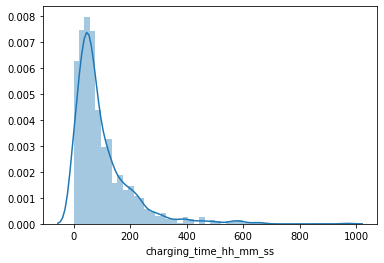

In [30]:
# Exploration on charge time as one of the research task
sns.distplot(df["charging_time_hh_mm_ss"])

In [43]:
print(df['charging_time_hh_mm_ss'].min())
print(df['charging_time_hh_mm_ss'].max())
print(df['charging_time_hh_mm_ss'].mean())

0.0
966.1166666666667
100.87248780487792


##### The distribution of Charge time is right skewed with a minimum charge time less than 1 minute, and the maximum is around 16 hours and 6 minutes. We can initially identify the average charging time is around 101 minutes.

### Total Energy

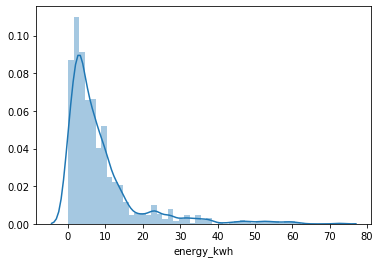

In [46]:
# Histogram of Total Energy consumed
sns.distplot(df["energy_kwh"])

In [47]:
df["energy_kwh"].describe()

count    1025.000000
mean        8.611493
std        10.169734
min         0.000000
25%         2.597000
50%         5.510000
75%        10.071000
max        72.626000
Name: energy_kwh, dtype: float64

##### Total Energy, as our target predicting variable, presents a right skewed pattern on histogram. Minimum energy consumption was almost 0 kWh, while maximum was about 72.62 kWh. Average consumption was 8.61 kWh.

#### Best Fitted Distribution (Optional)

,sumsquare_error,aic,bic,kl_div
gompertz,0.008249,1312.490601,-12002.616169,inf
exponnorm,0.008359,1284.168936,-11988.981619,inf
expon,0.008383,1277.980873,-11993.008811,inf
genexpon,0.008384,1283.772752,-11972.018306,inf
johnsonsu,0.008416,1201.973216,-11975.083724,inf


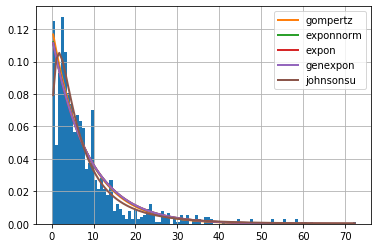

In [48]:
## Best fitted distribution - OPtional
f_totalenergy = Fitter(df["energy_kwh"])
f_totalenergy.fit() 
f_totalenergy.summary()

In [49]:
f_totalenergy.get_best(method='sumsquare_error')

{'gompertz': {'c': 2573446216788.067,
  'loc': -9.346080875003137e-14,
  'scale': 21102848547398.477}}

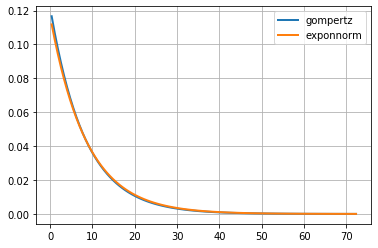

In [50]:
f_totalenergy.plot_pdf(names=None, Nbest=2, lw=2) 

#### Fit Exponnorm Distribution

Text(0.5, 1.0, 'Exponnorm probability plot of energy_kwh')

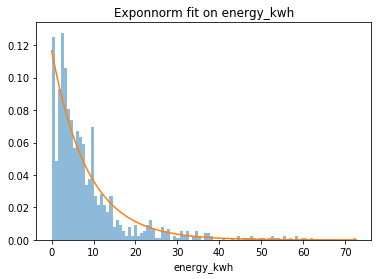

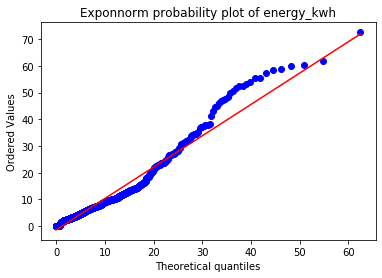

In [51]:
# Lognormal Distribution
shape,loc,scale=scipy.stats.exponnorm.fit(df["energy_kwh"]) 
fitted=scipy.stats.exponnorm(shape,loc,scale) 
plt.hist(df["energy_kwh"],bins=100,density=True,alpha=0.5) 
x=np.linspace(df["energy_kwh"].min(),df["energy_kwh"].max(),100) 
plt.plot(x,fitted.pdf(x)) 
plt.title("Exponnorm fit on energy_kwh") 
plt.xlabel("energy_kwh") 
scipy.stats.probplot(df["energy_kwh"],dist=fitted, plot=plt.figure().add_subplot(111)) 
plt.title("Exponnorm probability plot of energy_kwh")

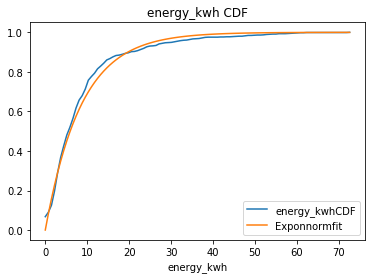

In [54]:
import statsmodels.distributions 
ecdf=statsmodels.distributions.ECDF(df["energy_kwh"]) 
plt.plot(x,ecdf(x),label="energy_kwhCDF") 
plt.plot(x,scipy.stats.exponnorm(shape,loc,scale).cdf(x), label="Exponnormfit")
plt.title("energy_kwh CDF") 
plt.xlabel("energy_kwh") 
plt.legend()

### Relationship Exploration Between All Attributes

#### Relationship between Charge Time and Total Energy¶

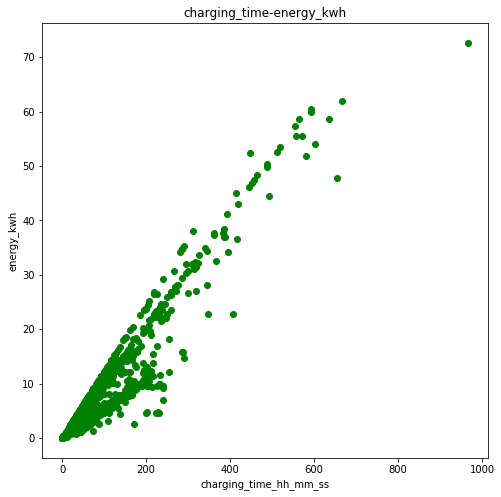

In [55]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(8, 8))

# Add x-axis and y-axis
ax.scatter(df['charging_time_hh_mm_ss'].values,
           df['energy_kwh'],
           color='green')

# Set title and labels for axes
ax.set(xlabel="charging_time_hh_mm_ss",
       ylabel="energy_kwh",
       title="charging_time-energy_kwh")

plt.show()

##### It is obvious that relationships between Charge Time and Total Energy are linears.